In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [127]:
using Revise
includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 



In [158]:
using StatsBase, Distributions, Plots, LinearAlgebra

In [242]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]

er = expected_regimes(states_zero,transition_matrix, 5)


5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [141]:
smoother(er, transition_matrix)

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [235]:
test_regimes = simulate_regimes(states_zero, transition_matrix, 500, 1)

500×1 Matrix{Int64}:
 1
 2
 2
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [243]:
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, 500, 1)[:,:,1]'

500×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.233881    0.0446349
 0.00671163  0.124628
 0.0676503   0.141971
 0.203469    0.140128
 0.0748279   0.131918
 0.199817    0.0947916
 0.265784    0.0980203
 0.224379    0.143503
 0.201435    0.120852
 0.319146    0.115243
 ⋮           
 0.190405    0.0610104
 0.184132    0.0910923
 0.113566    0.0764111
 0.121379    0.108981
 0.172946    0.0825253
 0.310164    0.11617
 0.258995    0.0942101
 0.119688    0.1127
 0.0256116   0.108619

In [244]:
Y = collect(test_returns)
T = 500
p = 1
X = hcat(ones(T-1), Y[p:end-1,:])

initial_states = [(transition_matrix[2,1]/(transition_matrix[2,1]+ transition_matrix[1,2])), transition_matrix[1,2]/(transition_matrix[2,1]+ transition_matrix[1,2])]

est_regimes = hamilton_filter(Y[2:end,:], X, [Β1, Β2], [Σ1, Σ2], transition_matrix, initial_states)
smoothed_regimes = smoother(est_regimes, transition_matrix)


499×2 Matrix{Float64}:
 0.105947  0.894053
 0.451634  0.548366
 0.770401  0.229599
 0.859506  0.140494
 0.95829   0.0417102
 0.971803  0.028197
 0.967245  0.0327547
 0.984119  0.0158807
 0.969693  0.030307
 0.984618  0.0153821
 ⋮         
 0.987911  0.0120891
 0.982581  0.0174192
 0.982082  0.0179184
 0.967111  0.0328894
 0.978499  0.0215006
 0.948286  0.0517136
 0.976547  0.023453
 0.901475  0.0985246
 0.753005  0.246995

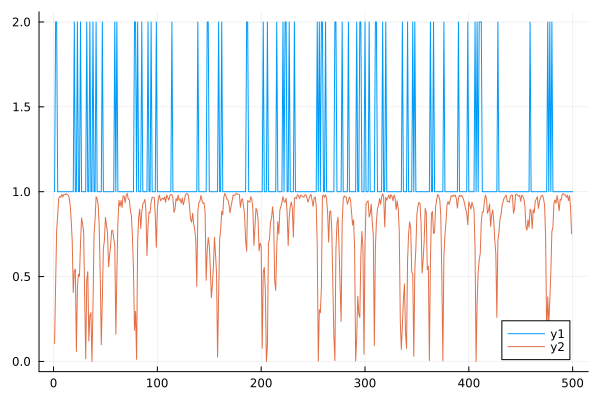

In [245]:
plot(test_regimes[:,1])
plot!(smoothed_regimes[:,1])


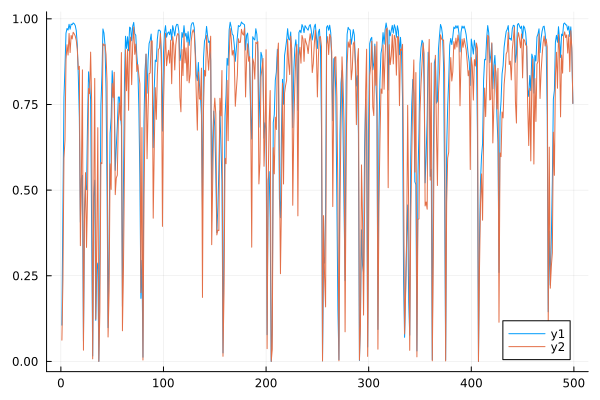

In [246]:
plot(smoothed_regimes[:,1])
plot!(est_regimes[:,1])

In [247]:
round.(sum(smoothed_regimes, dims=2), digits=4)

499×1 Matrix{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [99]:
smoothed_regimes[end,:]

2-element Vector{Float64}:
 0.4179974827533813
 0.5820025172466187

In [104]:
transition_matrix * smoothed_regimes[end-1,:]

2-element Vector{Float64}:
 0.8666387236674473
 0.22896493597720516

In [113]:
ST = est_regimes[end,:]
Stm1 = est_regimes[end-1,:]
Stm2 = est_regimes[end-2,:]


1.0

In [126]:
transition_matrix = [.9 .1;.2 .8]

states_zero = [.67, .33]

r = transition_matrix * states_zero

sum(r)

1.0340000000000003

In [132]:

r = (transition_matrix * (ST ./ next_regime(Stm1, transition_matrix))) .* Stm1
display(r)
sum(r)

2-element Vector{Float64}:
 0.8673780853203387
 0.13262191467966128

1.0

#TODO 
- sas

In [117]:

#TODO 
#- naprawić smoother
#-zrobić własne obliczenia predict dla h+2 : Xt st1 * b1 * proba st1 * transition_matrix + xt st2 * b1 * prob st2 * transition matrix
#- zrobić testy stabilne, np seed lub porwnanie rozkładow
#reorganizować kod i testy, wdrożyć jakieś normalne środowisko

UndefVarError: UndefVarError: `naprawić` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

BETA coefficient
 
#Beta and intercept time varing

In [248]:
Y = [.16 .05; .13 .045; .07 .03]

X = [1. .12 .06; 1. .16 .05; 1. .13 .045]

regimes_probs = [.9 .1; .8 .2; .7 .3]
#regimes_probs = [1. .0; 1. .0; 1. .0]

3×2 Matrix{Float64}:
 0.9  0.1
 0.8  0.2
 0.7  0.3

In [253]:
m_regime = diagm(regimes_probs[:,1])
Xhat = m_regime.^.5 * X

3×3 Matrix{Float64}:
 0.948683  0.113842  0.056921
 0.894427  0.143108  0.0447214
 0.83666   0.108766  0.0376497

In [258]:
Β1 = inv(Xhat'm_regime*Xhat)*(Xhat'm_regime)*Y

3×2 Matrix{Float64}:
 -0.331375  -0.0571124
  1.00046    0.265162
  6.3329     1.29996

In [259]:
m2_regime = diagm(regimes_probs[:,2])
Xhat2 = m2_regime.^.5 * X
Β2 = inv(Xhat2'm2_regime*Xhat2)*Xhat2'm2_regime*Y


3×2 Matrix{Float64}:
 -1.18348  -0.30999
  1.10498   0.342108
 25.9475    7.11751

In [212]:
inv(X'X)*X'

3×3 Matrix{Float64}:
  -1.4  -4.8    7.2
 -10.0  30.0  -20.0
  60.0  20.0  -80.0

In [266]:
#Test
m_regime * Xhat * Β1 + m2_regime * Xhat2 * Β2

3×2 Matrix{Float64}:
 0.16  0.05
 0.13  0.045
 0.07  0.03

In [228]:
y = vec(Y)
Β1 = kron(inv(X'm2_regime*X)*X'm2_regime, Matrix(I,2,2))*y


6-element Vector{Float64}:
 -0.235999999999986
 -0.20599999999998825
 -0.4000000000000343
 -0.40000000000002844
  7.399999999999836
  6.39999999999986